In [1]:
import sys

sys.path.append("../python")

from data import Dataloader

In [2]:
from models import HeuristicModel

# Loading the data
data_loader = Dataloader("../data/dataset_10") # Specify path to the dataset you want to load
X, Y = data_loader.load()
Z = data_loader.get_ground_truth_labels()

model = HeuristicModel()
model.fit(X, Y)

c:\Users\romai\Documents\Centrale\Système de décision\Projet\cs-sdp-2023-24\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\romai\Documents\Centrale\Système de décision\Projet\cs-sdp-2023-24\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")



427/427 [==============================] - 1s 1ms/step - loss: 0.2360
Epoch 1/50
1366/1366 [==============================] - 2s 2ms/step - loss: 0.0402 - val_loss: 0.0103
Epoch 2/50
1366/1366 [==============================] - 2s 2ms/step - loss: 0.0282 - val_loss: 0.0079
Epoch 3/50
1366/1366 [==============================] - 2s 2ms/step - loss: 0.0181 - val_loss: 0.0051
Epoch 4/50
1366/1366 [==============================] - 2s 2ms/step - loss: 0.0155 - val_loss: 0.0065
Epoch 4: early stopping
414/414 [==============================] - 1s 899us/step - loss: 0.9134
Epoch 1/50
1325/1325 [==============================] - 3s 2ms/step - loss: 0.1040 - val_loss: 0.0202
Epoch 2/50
1325/1325 [==============================] - 2s 2ms/step - loss: 0.0608 - val_loss: 0.0168
Epoch 3/50
1325/1325 [==============================] - 2s 2ms/step - loss: 0.0371 - val_loss: 0.0106
Epoch 4/50
1325/1325 [==============================] - 2s 2ms/step - loss: 0.0286 - val_loss: 0.0067
Epoch 5/50
1325/1

In [3]:
model.save_model_weights("./weights/heuristic_model_weights_1")

Modèles sauvegardés dans ./weights/heuristic_model_weights_1


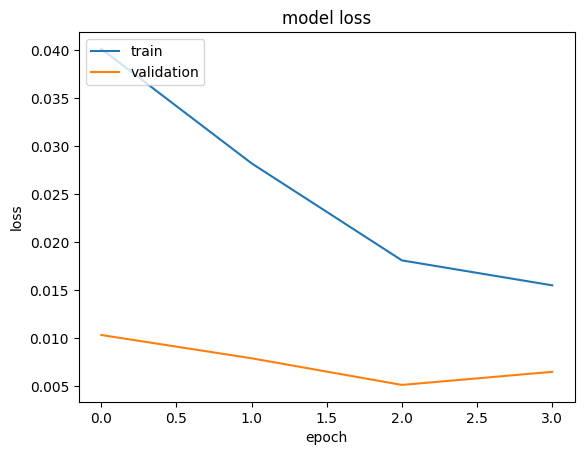

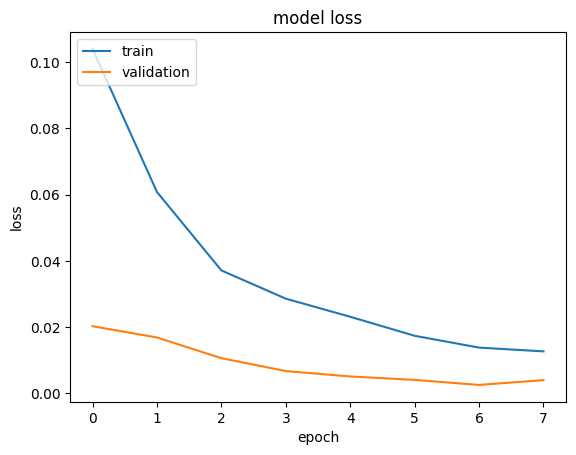

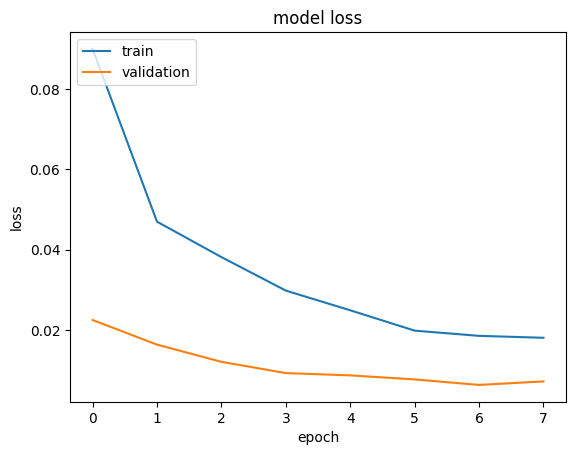

In [4]:
model.plot_history()

In [5]:
from metrics import PairsExplained, ClusterIntersection

pairs_explained_metric = PairsExplained()
print("Percentage of explained preferences on train data:", pairs_explained_metric.from_model(model, X, Y))


1251/1251 [==============================] - 1s 657us/step


AttributeError: 'list' object has no attribute 'shape'

In [5]:
cluster_intersection_metric = ClusterIntersection()
print("Percentage of preferences well regrouped into clusters:", cluster_intersection_metric.from_model(model, X, Y,Z))

NameError: name 'ClusterIntersection' is not defined

In [7]:
model.predict_utility(X)

1251/1251 [==============================] - 1s 673us/step


[array([[0.9999916],
        [0.9998821],
        [0.9999423],
        ...,
        [0.0217835],
        [0.9999699],
        [0.9787519]], dtype=float32),
 array([[0.9999916],
        [0.9998821],
        [0.9999423],
        ...,
        [0.0217835],
        [0.9999699],
        [0.9787519]], dtype=float32),
 array([[0.9999916],
        [0.9998821],
        [0.9999423],
        ...,
        [0.0217835],
        [0.9999699],
        [0.9787519]], dtype=float32)]

In [1]:
import sys

sys.path.append("../python")

from data import Dataloader
from models import HeuristicModel

# Loading the data
data_loader = Dataloader("../data/dataset_10") # Specify path to the dataset you want to load
X, Y = data_loader.load()
Z = data_loader.get_ground_truth_labels()

model = HeuristicModel()
model.load_model_weights("./weights/heuristic_model_weights_1")




Poids chargés depuis ./weights/heuristic_model_weights_1\model_0.h5
Poids chargés depuis ./weights/heuristic_model_weights_1\model_1.h5
Poids chargés depuis ./weights/heuristic_model_weights_1\model_2.h5


In [2]:
model.predict_utility(X[:5])

1/1 [==============================] - 0s 60ms/step


array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [4]:
model.predict_preference(X[1].reshape(1, -1), Y[1].reshape(1, -1))

1/1 [==============================] - 0s 16ms/step


array([[[0.9999988]],

       [[0.9999988]],

       [[0.9999988]]], dtype=float32)

In [6]:
from metrics import PairsExplained, ClusterIntersection

pairs_explained_metric = PairsExplained()
print("Percentage of explained preferences on train data:", pairs_explained_metric.from_model(model, X, Y))

cluster_intersection_metric = ClusterIntersection()
print("Percentage of preferences well regrouped into clusters:", cluster_intersection_metric.from_model(model, X, Y,Z))

1251/1251 [==============================] - 1s 644us/step
Percentage of explained preferences on train data: 0.0
1251/1251 [==============================] - 1s 658us/step
Percentage of preferences well regrouped into clusters: 0.3333166670833229
